In [1]:
a = [0,1,2]
b = [3,4,5]
c = [*a, *b]
c

[0, 1, 2, 3, 4, 5]

In [2]:
[*a]

[0, 1, 2]

In [3]:
import requests
import pandas as pd
pd.set_option('display.max_rows', 1000)
import matplotlib.pyplot as plt
from talib import RSI, BBANDS

In [4]:
#URL = 'https://www.monster.com/jobs/search/?q=Software-Developer&where=Australia'
URL = "https://marknadssok.fi.se/publiceringsklient"
page = requests.get(URL)

In [5]:
from bs4 import BeautifulSoup, Tag

soup = BeautifulSoup(page.content, 'lxml')#'html.parser')

In [6]:
#print(soup.prettify())

In [7]:
res = soup.find('table')
#print(res)
#print(res.prettify())

In [8]:
table = soup.find_all('table')#, attrs={'class':'subs noBorders evenRows'})
#print(table)
#table_rows = table.find_all('tr')

Headers

In [9]:
head_list = []
for th in soup.find("tr"):
    #print(type(th))
    if isinstance(th, Tag):
        head_list.append(th.get_text())

In [10]:
counter = 0
lista = []
for tr in soup.find_all('tr'):
    tds = tr.find_all('td')
    row = [elem.get_text() for elem in tds]
    lista.append(row)
    counter += 1
    #if counter > 4:
    #    break

In [11]:
len(lista)

11

In [12]:
tds[0].get_text()

'2022-01-23'

https://marknadssok.fi.se/publiceringsklient?Page=2

In [13]:
import pdb

In [14]:
def get_page_data(page_number=3):
    URL = f"https://marknadssok.fi.se/publiceringsklient?Page={page_number}"
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, 'lxml')#'html.parser')
    lista = []
    for tr in soup.find_all('tr'):
        tds = tr.find_all('td')
        #pdb.set_trace()
        row = [elem.get_text().replace("\xa0", " ") for elem in tds]
        if row: 
            lista.append(row)
    return lista

In [15]:
lista = get_page_data(4)
len(lista)

10

In [16]:
res = []
for i in range(1, 1000):
    lista = get_page_data(i)
    res += lista
    if i % 100 == 0:
        print(i)

100
200
300
400
500
600
700
800
900


In [17]:

df = pd.DataFrame(res, columns=head_list)
df.head(2)

,Publiceringsdatum,Emittent,Person i ledande ställning,Befattning,Närstående,Karaktär,Instrumentnamn,Instrumenttyp,ISIN,Transaktionsdatum,Volym,Volymsenhet,Pris,Valuta,Status,Detaljer
0,2022-01-23,Everysport Media Group AB,Anders Erling Ribbing,"Annan medlem i bolagets administrations-, ledn...",,Förvärv,EVERYSPORT MEDIA GR,Aktie,SE0016127831,2022-01-21,4 000,Antal,"42,00",SEK,,\nAnmälan\n
1,2022-01-23,Everysport Media Group AB,Anders Erling Ribbing,"Annan medlem i bolagets administrations-, ledn...",,Förvärv,EVERYSPORT MEDIA GR,Aktie,SE0016127831,2022-01-21,4 000,Antal,"42,60",SEK,,\nAnmälan\n


In [18]:
len(res)

9990

In [19]:
df["Transaktionsdatum"] = pd.to_datetime(df["Transaktionsdatum"])
df["Publiceringsdatum"] = pd.to_datetime(df["Publiceringsdatum"])
print(min(df["Transaktionsdatum"]))
print(max(df["Transaktionsdatum"]))
print(min(df["Publiceringsdatum"]))
print(max(df["Publiceringsdatum"]))

2016-07-03 00:00:00
2022-01-21 00:00:00
2021-07-08 00:00:00
2022-01-23 00:00:00


In [20]:
# Drop "Makulerad"
crit_mak = df["Status"] == "Makulerad"
df.drop(df[crit_mak].index, inplace=True)
# Drop "Reviderad"
crit_mak = df["Status"] == "Reviderad"
df.drop(df[crit_mak].index, inplace=True)

In [21]:
df["Status"].value_counts()

            8302
Historik     779
Name: Status, dtype: int64

In [22]:
crit5 = df["Person i ledande ställning"] == "Stefan Hultberg"
df[crit5]

,Publiceringsdatum,Emittent,Person i ledande ställning,Befattning,Närstående,Karaktär,Instrumentnamn,Instrumenttyp,ISIN,Transaktionsdatum,Volym,Volymsenhet,Pris,Valuta,Status,Detaljer


Something strange with Status == Historik

In [23]:
df["Valuta"].value_counts(dropna=False)

SEK    8652
EUR     224
CAD     124
CHF      40
USD      23
NOK      12
GBP       5
BWP       1
Name: Valuta, dtype: int64

In [24]:
df["Karaktär"].value_counts()

Förvärv                               5447
Avyttring                             1692
Teckning                               502
Tilldelning                            422
Lösen minskning                        288
Lösen ökning                           200
Utdelning mottagen                      68
Lån återgång ökning                     67
Lån utlåning                            61
Konvertering minskning                  48
Konvertering ökning                     36
Gåva lämnad                             35
Utdelning lämnad                        33
Utbyte ökning                           29
Utbyte minskning                        28
Lån mottaget                            25
Pantsättning                            18
Lån återgång minskning                  17
Gåva mottagen                           16
Fusion ökning                           11
Inlösen egenutfärdat instrument         10
Pantsättning åter                        6
Fusion minskning                         5
Utfärdande 

In [25]:
df.head(2)

,Publiceringsdatum,Emittent,Person i ledande ställning,Befattning,Närstående,Karaktär,Instrumentnamn,Instrumenttyp,ISIN,Transaktionsdatum,Volym,Volymsenhet,Pris,Valuta,Status,Detaljer
0,2022-01-23,Everysport Media Group AB,Anders Erling Ribbing,"Annan medlem i bolagets administrations-, ledn...",,Förvärv,EVERYSPORT MEDIA GR,Aktie,SE0016127831,2022-01-21,4 000,Antal,"42,00",SEK,,\nAnmälan\n
1,2022-01-23,Everysport Media Group AB,Anders Erling Ribbing,"Annan medlem i bolagets administrations-, ledn...",,Förvärv,EVERYSPORT MEDIA GR,Aktie,SE0016127831,2022-01-21,4 000,Antal,"42,60",SEK,,\nAnmälan\n


In [26]:
df["Emittent"] = df["Emittent"].str.lower()
# Remove leftmost empty space
df["Emittent"] = df["Emittent"].str.lstrip()
df["Emittent"] = df["Emittent"].str.rstrip()

In [27]:
df["Utgivare2"] = df["Emittent"]

In [28]:
#df["Utgivare2"] = df["Utgivare2"].str.replace("ab ", "")
#df["Utgivare2"] = df["Utgivare2"].str.replace(" ab", "")
df["Utgivare2"] = df["Utgivare2"].str.replace("aktiebolag", "")
df["Utgivare2"] = df["Utgivare2"].str.replace("a/b", "")
df["Utgivare2"] = df["Utgivare2"].str.replace("\(publ\)", "")
df["Utgivare2"] = df["Utgivare2"].str.replace("\(publ.\)", "")
df["Utgivare2"] = df["Utgivare2"].str.replace("publ", "")
df["Utgivare2"] = df["Utgivare2"].str.replace("holding", "")
df["Utgivare2"] = df["Utgivare2"].str.replace("et ", "")
df["Utgivare2"] = df["Utgivare2"].str.replace(" et", "")
df["Utgivare2"] = df["Utgivare2"].str.replace("international", "")
df["Utgivare2"] = df["Utgivare2"].str.replace("bank", "")
df["Utgivare2"] = df["Utgivare2"].str.replace("group", "")
df["Utgivare2"] = df["Utgivare2"].str.replace("fastigheter", "")
df["Utgivare2"] = df["Utgivare2"].str.replace("  ", "")
df["Utgivare2"] = df["Utgivare2"].str.replace("ltd", "")
df["Utgivare2"] = df["Utgivare2"].str.replace(".", "")
df["Utgivare2"] = df["Utgivare2"].str.replace("-", "")
df["Utgivare2"] = df["Utgivare2"].str.replace("sweden", "")
df["Utgivare2"] = df["Utgivare2"].str.replace("fastighets", "")
#df["Utgivare2"] = df["Utgivare2"].str.replace(" a", "")
#df["Utgivare2"] = df["Utgivare2"].str.replace(" b", "")
df["Utgivare2"] = df["Utgivare2"].str.replace(" ser", "")
df["Utgivare2"] = df["Utgivare2"].str.replace("\(pub\)", "")
df["Utgivare2"] = df["Utgivare2"].str.replace(r"\(.*\)","")

df["Utgivare2"] = df["Utgivare2"].str.rstrip()
df["Utgivare2"] = df["Utgivare2"].str.lstrip()

C:\Users\9ja\AppData\Local\Temp/ipykernel_19140/2576079831.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Utgivare2"] = df["Utgivare2"].str.replace("\(publ\)", "")
C:\Users\9ja\AppData\Local\Temp/ipykernel_19140/2576079831.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Utgivare2"] = df["Utgivare2"].str.replace("\(publ.\)", "")
C:\Users\9ja\AppData\Local\Temp/ipykernel_19140/2576079831.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Utgivare2"] = df["Utgivare2"].str.replace(".", "")
C:\Users\9ja\AppData\Local\Temp/ipykernel_19140/2576079831.py:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Utgivare2"] = df["Utgivare2"].str.replace("\(pub\)", "")
C:\Us

In [29]:
df["Utgivare2"].str.lower().str.contains("artificial").sum()

27

Filter on "Karaktär", only use "Förvärv" and "Avyttring" for now.

In [30]:
df["Instrumentnamn"].value_counts().sort_index()

\t Exelity Kapitalandelsbevis 1                          1
\t Xpecunia Nordic Aktiebolag                            1
\tBeijer Ref AB ser. B                                   1
\tFilo Mining Corp., Options to Acquire Common Shares    1
\tVSSAB SS BTA                                           1
                                                        ..
tekningsoption 2021:3                                    1
vimian c share                                           1
warrant cad 0.37                                         1
warrants                                                 1
”Teckningsoption 2021:4”                                 1
Name: Instrumentnamn, Length: 1875, dtype: int64

In [31]:
df.head(2)

,Publiceringsdatum,Emittent,Person i ledande ställning,Befattning,Närstående,Karaktär,Instrumentnamn,Instrumenttyp,ISIN,Transaktionsdatum,Volym,Volymsenhet,Pris,Valuta,Status,Detaljer,Utgivare2
0,2022-01-23,everysport media group ab,Anders Erling Ribbing,"Annan medlem i bolagets administrations-, ledn...",,Förvärv,EVERYSPORT MEDIA GR,Aktie,SE0016127831,2022-01-21,4 000,Antal,"42,00",SEK,,\nAnmälan\n,everysport mediaab
1,2022-01-23,everysport media group ab,Anders Erling Ribbing,"Annan medlem i bolagets administrations-, ledn...",,Förvärv,EVERYSPORT MEDIA GR,Aktie,SE0016127831,2022-01-21,4 000,Antal,"42,60",SEK,,\nAnmälan\n,everysport mediaab


In [32]:
crit1 = df["Karaktär"] == "Förvärv"
crit2 = df["Karaktär"] == "Avyttring"
df[crit1 | crit2][["Emittent", "Utgivare2", "Instrumentnamn", "Karaktär", "Närstående", "Valuta", "Befattning", "Volym", "Pris", "Person i ledande ställning"]].sort_values("Utgivare2").head()

,Emittent,Utgivare2,Instrumentnamn,Karaktär,Närstående,Valuta,Befattning,Volym,Pris,Person i ledande ställning
2664,24 storage ab,24 storage ab,Stamaktie,Avyttring,Ja,SEK,Styrelseledamot,2 250 000,"76,00",Staffan Persson
2697,24 storage ab,24 storage ab,Stamaktie,Avyttring,,SEK,Styrelseledamot,25 000,"76,00",Staffan Persson
2699,24 storage ab,24 storage ab,Stamaktie,Avyttring,,SEK,Styrelseledamot,79 336,"76,00",Staffan Persson
2761,24storage ab,24storage ab,24Storage AB,Avyttring,Ja,SEK,Styrelseledamot,85 000,"76,00",Maria Åkrans
2717,24storage ab,24storage ab,24Storage AB,Avyttring,,SEK,Styrelseordförande,550 000,"76,00",Jan-Olof Backman


In [33]:
df["Pris"] = df["Pris"].str.replace(",", ".")
df["Pris"] = df["Pris"].str.replace(" ", "")

In [34]:
df["Pris"] = df["Pris"].astype("float")

In [35]:
# Remove "Volym" with "," as it doesnt make sense
cond = df["Volym"].str.contains(",")
df = df[~cond]

In [36]:
# Remove rows with 0 price
cond = df["Pris"] == 0.0
df = df[~cond]

In [37]:
# Remove "Volym" with way too high volumes
cond = df["Volym"].apply(lambda x: len(x)) >= 8
#cond = df["Volym"].str.len() >= 8
df = df[~cond]

In [38]:
df["Utgivare2"].str.lower().str.contains("artificial").sum()

27

In [39]:
# Remove TR, KO, TO from Instrumentnamn
cond1 = df["Instrumentnamn"].str.contains(" KO")
cond2 = df["Instrumentnamn"].str.contains("KO ")
cond3 = df["Instrumentnamn"].str.contains("TO ")
cond4 = df["Instrumentnamn"].str.contains(" TO")
cond5 = df["Instrumentnamn"].str.contains("TR ")
cond6 = df["Instrumentnamn"].str.contains(" TR")
cond7 = df["Instrumentnamn"].str.contains("Teckningsoption")
cond8 = df["Instrumentnamn"].str.contains("Optionsprogram")
cond9 = df["Instrumentnamn"].str.contains("KO")
cond10 = df["Instrumentnamn"].str.lower().str.contains("option")
df = df[~(cond1 | cond2 | cond3 | cond4 | cond5 | cond6 | cond7 | cond8 | cond9 | cond10)]

In [48]:
df["Volym"] = df["Volym"].str.replace(" ", "")
cond = df.Volym == ""
df = df[~cond]
df["Volym"] = df["Volym"].astype("int")

In [49]:
df["Total"] = df["Volym"] * df["Pris"]

In [50]:
df.head()

,Publiceringsdatum,Emittent,Person i ledande ställning,Befattning,Närstående,Karaktär,Instrumentnamn,Instrumenttyp,ISIN,Transaktionsdatum,Volym,Volymsenhet,Pris,Valuta,Status,Detaljer,Utgivare2,Total
0,2022-01-23,everysport media group ab,Anders Erling Ribbing,"Annan medlem i bolagets administrations-, ledn...",,Förvärv,EVERYSPORT MEDIA GR,Aktie,SE0016127831,2022-01-21,4000,Antal,42.0,SEK,,\nAnmälan\n,everysport mediaab,168000.0
1,2022-01-23,everysport media group ab,Anders Erling Ribbing,"Annan medlem i bolagets administrations-, ledn...",,Förvärv,EVERYSPORT MEDIA GR,Aktie,SE0016127831,2022-01-21,4000,Antal,42.6,SEK,,\nAnmälan\n,everysport mediaab,170400.0
2,2022-01-23,everysport media group ab,Anders Erling Ribbing,"Annan medlem i bolagets administrations-, ledn...",,Förvärv,EVERYSPORT MEDIA GR,Aktie,SE0016127831,2022-01-21,2785,Antal,42.0,SEK,,\nAnmälan\n,everysport mediaab,116970.0
3,2022-01-23,everysport media group ab,Anders Erling Ribbing,"Annan medlem i bolagets administrations-, ledn...",,Förvärv,EVERYSPORT MEDIA GR,Aktie,SE0016127831,2022-01-20,3868,Antal,42.4,SEK,,\nAnmälan\n,everysport mediaab,164003.2
5,2022-01-23,quartiers properties ab (publ),Egonomics AB,Styrelseledamot,,Avyttring,Stamaktie,Aktie,SE0009697204,2022-01-18,67522,Antal,4.7,SEK,Historik,\nAnmälan\n,quartiers properties ab,317353.4


In [51]:
df["pris_median"] = df.groupby("Utgivare2")["Pris"].transform("median")
df["purchases"] = df.groupby("Utgivare2")["Pris"].transform("count")

In [52]:
df["Utgivare2"].str.lower().str.contains("artificial").sum()

27

In [53]:
df[(df["Karaktär"] == "Förvärv") & (df["Utgivare2"].str.lower().str.contains("artificial"))]["Person i ledande ställning"].nunique()

3

In [54]:
df[:int(df.shape[0]/2)]

,Publiceringsdatum,Emittent,Person i ledande ställning,Befattning,Närstående,Karaktär,Instrumentnamn,Instrumenttyp,ISIN,Transaktionsdatum,Volym,Volymsenhet,Pris,Valuta,Status,Detaljer,Utgivare2,Total,pris_median,purchases
0,2022-01-23,everysport media group ab,Anders Erling Ribbing,"Annan medlem i bolagets administrations-, ledn...",,Förvärv,EVERYSPORT MEDIA GR,Aktie,SE0016127831,2022-01-21,4000,Antal,42.00,SEK,,\nAnmälan\n,everysport mediaab,168000.0,42.60,13
1,2022-01-23,everysport media group ab,Anders Erling Ribbing,"Annan medlem i bolagets administrations-, ledn...",,Förvärv,EVERYSPORT MEDIA GR,Aktie,SE0016127831,2022-01-21,4000,Antal,42.60,SEK,,\nAnmälan\n,everysport mediaab,170400.0,42.60,13
2,2022-01-23,everysport media group ab,Anders Erling Ribbing,"Annan medlem i bolagets administrations-, ledn...",,Förvärv,EVERYSPORT MEDIA GR,Aktie,SE0016127831,2022-01-21,2785,Antal,42.00,SEK,,\nAnmälan\n,everysport mediaab,116970.0,42.60,13
3,2022-01-23,everysport media group ab,Anders Erling Ribbing,"Annan medlem i bolagets administrations-, ledn...",,Förvärv,EVERYSPORT MEDIA GR,Aktie,SE0016127831,2022-01-20,3868,Antal,42.40,SEK,,\nAnmälan\n,everysport mediaab,164003.2,42.60,13
5,2022-01-23,quartiers properties ab (publ),Egonomics AB,Styrelseledamot,,Avyttring,Stamaktie,Aktie,SE0009697204,2022-01-18,67522,Antal,4.70,SEK,Historik,\nAnmälan\n,quartiers properties ab,317353.4,4.28,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,2021-10-28,aligro planet acquisition company ab,Carl-Fredrik Jaensson,Annan ledande befattningshavare,,Förvärv,APAC ser. B,Aktie,SE0015949557,2021-10-27,13000,Antal,0.20,SEK,,\nAnmälan\n,aligro planacquisition company ab,2600.0,0.20,4
4967,2021-10-28,eblitz group ab,Henrik Sporje,"Annan medlem i bolagets administrations-, ledn...",,Förvärv,eBlitz Group,Aktie,SE0009580756,2021-10-27,2000,Antal,2.20,SEK,,\nAnmälan\n,eblitzab,4400.0,2.20,7
4968,2021-10-28,ab industrivärden,Bengt Kjell,Styrelseledamot,Ja,Utdelning mottagen,A aktie,Aktie,SE0000190126,2021-10-27,7,Antal,281.00,SEK,,\nAnmälan\n,ab industrivärden,1967.0,281.00,2
4969,2021-10-28,eblitz group ab,Lars-Erik Bratt,Verkställande direktör (VD),,Förvärv,eBlitz Group,Aktie,SE0009580756,2021-10-27,1500,Antal,2.26,SEK,,\nAnmälan\n,eblitzab,3390.0,2.20,7


In [55]:

cond = df["purchases"] > 3
drop_rows = df["Pris"] > df["pris_median"]*10 
df.drop(df[cond & drop_rows].index, inplace=True)
#["max"] / df_sum["median"] > 10 

In [56]:
df["Utgivare2"].str.lower().str.contains("artificial").sum()

27

In [57]:
crit1 = df["Karaktär"] == "Avyttring"
crit2 = df["Karaktär"] == "Förvärv"

In [58]:
df[crit2]["Emittent"].str.contains("artificial").sum()

27

In [59]:
#df[crit2].groupby("Utgivare2").agg({"Total": ["sum", "count", "mean"], "Person i ledande ställning": "nunique", "Instrumentnamn":pd.Series.mode}).sort_values(("Person i ledande ställning", "nunique"), ascending=False)
#df[crit2].groupby("Utgivare2").agg({"Total": ["sum", "count", "mean"], "Person i ledande ställning": "nunique", "Instrumentnamn": lambda x: x.mode().iloc[0], "Befattning":lambda x: x.count if x.str.lower.contains("vd")}).sort_values(("Person i ledande ställning", "nunique"), ascending=False)
df_sum = df[crit2].groupby("Utgivare2").agg({"Pris":["median", "mean", "std", "min", "max"], "Total": ["sum", "count", "mean"], "Person i ledande ställning": "nunique", "Instrumentnamn": lambda x: x.mode().iloc[0]})#.sort_values(("Person i ledande ställning", "nunique"), ascending=False)
df_sum["points"] = df_sum[("Person i ledande ställning", "nunique")] / df_sum[("Person i ledande ställning", "nunique")].mean() + df_sum[("Total", "count")] / df_sum[("Total", "count")].mean()  + df_sum[("Total", "sum")] / df_sum[("Total", "sum")].mean()

In [60]:
df_sum.sort_values(("Person i ledande ställning","nunique"), ascending=False).head(50)

Pris                         \
                                     median        mean        std   
Utgivare2                                                            
volvo car ab                       58.74000   57.687506   2.985668   
abb                                33.12000   29.333529   4.967877   
sweco ab                          155.44000  154.012500   4.945005   
skanska ab                        234.61010  231.607444  10.095601   
humbleab                           24.14750   22.797333   5.977832   
bergman & beving                  149.32000  139.496923  38.386709   
arlandastadab                      67.50000   68.512000   3.655030   
lindabab                          232.00000  202.130000  82.731638   
xp chemistries ab                   4.50000    4.300000   0.445614   
embracerab                         85.70000  119.380979  61.556263   
ytradeab                            3.22500    3.312827   0.342921   
lagercrantzab                     115.00000  109.993636  19.323681   
academedia ab                      58.60000   62.675000   8.413892   
episurf medical ab                  3.44000    3.155734   1.404311   
scout gamingab                     25.33000   20.744868   8.993799   
samhällsbyggnadsbolagi norden ab   57.92000   56.220700   6.654962   
desenioab                          45.43400   37.819207  12.577097   
sdiptech ab                       422.67000  429.270000  15.990126   
adtractionab                       60.00000   61.647500   4.659834   
industrivärden                    278.64290  283.981635  13.762241   
sernekeab                          52.09500   52.082500   0.843447   
wickgaming ab                      31.20000   29.785067   3.492023   
soltech energy  ab                 20.62000   21.039130   1.565268   
bomill ab                           4.00000    4.000000   0.000000   
inzile ab                          20.50000   20.165000   3.264952   
fundedbyme crowdfunding             1.21500    1.125807   0.292000   
goobitab                            3.80050    3.233481   1.372010   
organoclick ab                      1.57000    2.122500   1.562706   
fastpartner ab                    119.70000  107.781788  18.641552   
bonesupportab                      74.00000   61.154043  20.535558   
momentum softwareab                61.00000   69.152186  11.404690   
distit ab                         111.69500  119.882026  12.838156   
elekta ab                         105.31500  103.831201   4.437270   
w5 solutions ab                    25.00000   19.658636   7.666278   
tfab                              200.00000  201.921336  21.436174   
greater than ab                     3.34000    3.720000   0.587273   
boozt ab                          157.34005  126.594431  59.983414   
kjellab                            55.00000   55.000000   0.000000   
cary ab                             8.20000   32.586073  33.888810   
fragbiteab                          4.00000    4.199818   0.278001   
atrium ljungberg ab               193.47500  183.670000  28.847826   
gpx medical ab                      2.60000    2.600000   0.000000   
rugvistaab                        130.50000  129.467143   3.716446   
saniona ab                         10.00450   10.241650   0.580896   
aros bostadsutveckling ab          58.50000   61.145536  10.829631   
norva24ab                          20.00000   20.000000   0.000000   
tempest security ab                33.90000   33.583661   1.944992   
azelio ab                          14.42550   18.651375  15.947481   
ratos ab                           49.11000   49.529500   1.881611   
bambuser ab                        14.82110   14.885350   0.317283   

                                                                 Total        \
                                         min         max           sum count   
Utgivare2                                                                      
volvo car ab                       53.000000   66.320000  3.863260e+07    31   
abb     

In [61]:

df2 = df[:int(df.shape[0]/4)].copy()
crit2 = df2["Karaktär"] == "Förvärv"
df_sum = df2[crit2].groupby("Utgivare2").agg({"Pris":["median", "mean", "std", "min", "max"], "Total": ["sum", "count", "mean"], "Person i ledande ställning": "nunique", "Instrumentnamn": lambda x: x.mode().iloc[0]})#.sort_values(("Person i ledande ställning", "nunique"), ascending=False)
df_sum["points"] = df_sum[("Person i ledande ställning", "nunique")] / df_sum[("Person i ledande ställning", "nunique")].mean() + df_sum[("Total", "count")] / df_sum[("Total", "count")].mean()  + df_sum[("Total", "sum")] / df_sum[("Total", "sum")].mean()
#df_sum.sort_values(("Total","count"), ascending=False).head(50)
df_sum.sort_values(("Person i ledande ställning","nunique"), ascending=False).head(50)

Pris                         \
                                      median        mean        std   
Utgivare2                                                             
sweco ab                          155.440000  155.440000   0.000000   
skanska ab                        229.250450  229.202868   5.773793   
greater than ab                     3.340000    3.720000   0.587273   
adtractionab                       60.000000   61.647500   4.659834   
samhällsbyggnadsbolagi norden ab   59.020000   59.591864   2.748702   
organoclick ab                      1.570000    2.122500   1.562706   
momentum softwareab                61.000000   70.160046  11.202671   
w5 solutions ab                    25.000000   25.177857   0.470566   
norva24ab                          20.000000   20.000000   0.000000   
aros bostadsutveckling ab          59.055000   59.491667   1.708601   
mti investment se                  13.400000   13.400000   0.000000   
billerudkorsnäs ab                159.875000  161.066667   2.572094   
humbleab                           24.635000   20.581800  10.212142   
logistea ab                        31.600000   31.759730   1.712322   
rejlers ab                        134.800000  135.426000   6.658031   
karnovab                           66.415000   66.593333   1.440995   
touchtech ab                       17.000000   12.059231   7.487476   
nordic paperab                     36.630000   36.491667   1.242179   
saniona ab                         10.004500   10.004500   0.000000   
bicoab                            269.100000  266.682530   5.083900   
awardit ab                        305.000000  301.800000   7.758866   
avanza ab                         294.800000  306.660000  22.579039   
heba  ab                          158.300000  157.500000   2.402776   
elekta ab                         105.407500  106.009602   2.244195   
hexatronicab                      460.500000  447.127975  41.552155   
soltech energy  ab                 20.800000   20.911250   0.627226   
iconovo ab                         78.000000   78.507692   2.104939   
fastpartner ab                    119.834500  119.775860   1.058968   
dometicab                         122.100000  118.914000   6.099015   
quartiers properties ab             6.485000    5.802143   1.146944   
plexian ab                          7.421289    7.360430   0.212987   
mestro ab                          17.150000   16.829000   1.457743   
akelius residential property ab     1.758306    1.753251   0.032578   
nilarab                             5.500000    5.843484   1.110015   
acconeer ab                        11.440000   11.440000   0.000000   
sustainionab                        1.370000    1.370000   0.000000   
embracerab                         84.875000   86.922000   4.174142   
empirab                            23.202750   20.728875   9.226597   
svedbergs i dalstorp ab            68.130000   60.255150  19.752069   
starbreeze ab                       1.054000    1.045400   0.016517   
devyser diagnostics ab             80.000000   82.387500   4.775000   
scout gamingab                     15.310000   15.242000   0.862160   
solid försäkrings                  60.855000   60.441000   1.382441   
garo ab                           202.000000  201.728571  13.321970   
genova propertyab                 128.400000  126.400000   7.408104   
getinge ab                        384.170000  384.763533   4.102032   
securitas ab                      125.850000  127.933333   4.548168   
sectra ab                         189.900000  188.741429   5.518047   
sdiptech ab                       425.000000  430.500000  13.973189   
cell impact ab                     25.920000   24.223333   3.008261   

                                                               Total        \
                                        min        max           sum count   
Utgivare2                                                                    
sweco ab                          155.4400

In [62]:
df_sum.sort_values(("Person i ledande ställning","nunique"), ascending=False).head(50)

Pris                         \
                                      median        mean        std   
Utgivare2                                                             
sweco ab                          155.440000  155.440000   0.000000   
skanska ab                        229.250450  229.202868   5.773793   
greater than ab                     3.340000    3.720000   0.587273   
adtractionab                       60.000000   61.647500   4.659834   
samhällsbyggnadsbolagi norden ab   59.020000   59.591864   2.748702   
organoclick ab                      1.570000    2.122500   1.562706   
momentum softwareab                61.000000   70.160046  11.202671   
w5 solutions ab                    25.000000   25.177857   0.470566   
norva24ab                          20.000000   20.000000   0.000000   
aros bostadsutveckling ab          59.055000   59.491667   1.708601   
mti investment se                  13.400000   13.400000   0.000000   
billerudkorsnäs ab                159.875000  161.066667   2.572094   
humbleab                           24.635000   20.581800  10.212142   
logistea ab                        31.600000   31.759730   1.712322   
rejlers ab                        134.800000  135.426000   6.658031   
karnovab                           66.415000   66.593333   1.440995   
touchtech ab                       17.000000   12.059231   7.487476   
nordic paperab                     36.630000   36.491667   1.242179   
saniona ab                         10.004500   10.004500   0.000000   
bicoab                            269.100000  266.682530   5.083900   
awardit ab                        305.000000  301.800000   7.758866   
avanza ab                         294.800000  306.660000  22.579039   
heba  ab                          158.300000  157.500000   2.402776   
elekta ab                         105.407500  106.009602   2.244195   
hexatronicab                      460.500000  447.127975  41.552155   
soltech energy  ab                 20.800000   20.911250   0.627226   
iconovo ab                         78.000000   78.507692   2.104939   
fastpartner ab                    119.834500  119.775860   1.058968   
dometicab                         122.100000  118.914000   6.099015   
quartiers properties ab             6.485000    5.802143   1.146944   
plexian ab                          7.421289    7.360430   0.212987   
mestro ab                          17.150000   16.829000   1.457743   
akelius residential property ab     1.758306    1.753251   0.032578   
nilarab                             5.500000    5.843484   1.110015   
acconeer ab                        11.440000   11.440000   0.000000   
sustainionab                        1.370000    1.370000   0.000000   
embracerab                         84.875000   86.922000   4.174142   
empirab                            23.202750   20.728875   9.226597   
svedbergs i dalstorp ab            68.130000   60.255150  19.752069   
starbreeze ab                       1.054000    1.045400   0.016517   
devyser diagnostics ab             80.000000   82.387500   4.775000   
scout gamingab                     15.310000   15.242000   0.862160   
solid försäkrings                  60.855000   60.441000   1.382441   
garo ab                           202.000000  201.728571  13.321970   
genova propertyab                 128.400000  126.400000   7.408104   
getinge ab                        384.170000  384.763533   4.102032   
securitas ab                      125.850000  127.933333   4.548168   
sectra ab                         189.900000  188.741429   5.518047   
sdiptech ab                       425.000000  430.500000  13.973189   
cell impact ab                     25.920000   24.223333   3.008261   

                                                               Total        \
                                        min        max           sum count   
Utgivare2                                                                    
sweco ab                          155.4400

In [63]:
crit2 = df["Karaktär"] == "Förvärv"
df_sum2 = df[crit2].groupby("Utgivare2").agg({"Pris":["median", "mean", "std", "min", "max"], "Total": ["sum", "count", "mean"], "Person i ledande ställning": "nunique", "Instrumentnamn": lambda x: x.mode().iloc[0]})#.sort_values(("Person i ledande ställning", "nunique"), ascending=False)
df_sum2["points"] = df_sum2[("Person i ledande ställning", "nunique")] / df_sum2[("Person i ledande ställning", "nunique")].max() + df_sum2[("Total", "count")] / df_sum2[("Total", "count")].max()  + df_sum2[("Total", "sum")] / df_sum2[("Total", "sum")].max()

In [64]:
df_sum2[df_sum2[("Person i ledande ställning", "nunique")] > 5].sort_values("points", ascending=False).head(50)

Pris                         \
                                     median        mean        std   
Utgivare2                                                            
volvo car ab                       58.74000   57.687506   2.985668   
skanska ab                        234.61010  231.607444  10.095601   
abb                                33.12000   29.333529   4.967877   
arlandastadab                      67.50000   68.512000   3.655030   
humbleab                           24.14750   22.797333   5.977832   
industrivärden                    278.64290  283.981635  13.762241   
sweco ab                          155.44000  154.012500   4.945005   
goobitab                            3.80050    3.233481   1.372010   
aros bostadsutveckling ab          58.50000   61.145536  10.829631   
bergman & beving                  149.32000  139.496923  38.386709   
ytradeab                            3.22500    3.312827   0.342921   
xp chemistries ab                   4.50000    4.300000   0.445614   
distit ab                         111.69500  119.882026  12.838156   
lindabab                          232.00000  202.130000  82.731638   
embracerab                         85.70000  119.380979  61.556263   
iconovo ab                         79.94120   79.796486   3.303464   
scout gamingab                     25.33000   20.744868   8.993799   
samhällsbyggnadsbolagi norden ab   57.92000   56.220700   6.654962   
inzile ab                          20.50000   20.165000   3.264952   
soltech energy  ab                 20.62000   21.039130   1.565268   
episurf medical ab                  3.44000    3.155734   1.404311   
lagercrantzab                     115.00000  109.993636  19.323681   
greater than ab                     3.34000    3.720000   0.587273   
boozt ab                          157.34005  126.594431  59.983414   
academedia ab                      58.60000   62.675000   8.413892   
tempest security ab                33.90000   33.583661   1.944992   
fastpartner ab                    119.70000  107.781788  18.641552   
desenioab                          45.43400   37.819207  12.577097   
momentum softwareab                61.00000   69.152186  11.404690   
sdiptech ab                       422.67000  429.270000  15.990126   
tfab                              200.00000  201.921336  21.436174   
fundedbyme crowdfunding             1.21500    1.125807   0.292000   
sernekeab                          52.09500   52.082500   0.843447   
cary ab                             8.20000   32.586073  33.888810   
w5 solutions ab                    25.00000   19.658636   7.666278   
rugvistaab                        130.50000  129.467143   3.716446   
wickgaming ab                      31.20000   29.785067   3.492023   
elekta ab                         105.31500  103.831201   4.437270   
adtractionab                       60.00000   61.647500   4.659834   
organoclick ab                      1.57000    2.122500   1.562706   
bonesupportab                      74.00000   61.154043  20.535558   
kjellab                            55.00000   55.000000   0.000000   
bomill ab                           4.00000    4.000000   0.000000   
freja eidab                        17.41000   17.866923   0.817969   
hayppab                            66.00000   66.159994   0.505945   
readlyab                           22.03000   20.623167   9.644413   
oncopeptides ab                     9.98000   17.806935  14.891698   
fragbiteab                          4.00000    4.199818   0.278001   
hemply balanceab                   22.60000   22.031818   2.003900   
betsson ab                         57.01760   41.859733  29.796601   

                                                                 Total        \
                                         min         max           sum count   
Utgivare2                                                                      
volvo car ab                       53.000000   66.320000  3.863260e+07    31   
skanska 

In [59]:
df_sum2[df_sum2.index.str.contains("artificial")]

Pris                                     Total        \
                     median    mean       std   min    max        sum count   
Utgivare2                                                                     
artificial solutions   7.79  8.0714  1.409684  1.49  11.35  2872842.4    50   

                                Person i ledande ställning  \
                           mean                    nunique   
Utgivare2                                                    
artificial solutions  57456.848                          6   

                                             Instrumentnamn    points  
                                                   <lambda>            
Utgivare2                                                              
artificial solutions  Artificial Solutions International AB  0.768116

In [74]:
df_sum2 = df[crit1].groupby("Utgivare2").agg({"Pris":["median", "mean", "std", "min", "max"], "Total": ["sum", "count", "mean"], "Person i ledande ställning": "nunique", "Instrumentnamn": lambda x: x.mode().iloc[0]})#.sort_values(("Person i ledande ställning", "nunique"), ascending=False)
df_sum2["points"] = (df_sum2[("Person i ledande ställning", "nunique")] - df_sum2[("Person i ledande ställning", "nunique")].min())/ (df_sum2[("Person i ledande ställning", "nunique")].max() - df_sum2[("Person i ledande ställning", "nunique")].min()) + (df_sum2[("Total", "count")] - df_sum2[("Total", "count")].min()) / (df_sum2[("Total", "count")].max() - df_sum2[("Total", "count")].min()) + (df_sum2[("Total", "sum")] -df_sum2[("Total", "sum")].min()) / (df_sum2[("Total", "sum")].max() - df_sum2[("Total", "sum")].min())

In [75]:
df_sum2.sort_values("points", ascending=False).head(20)

Pris                               \
                                 median           mean           std   
Utgivare2                                                              
synsam ab                     50.000000      50.000000  0.000000e+00   
boozt ab                     186.550000     186.227273  1.422676e+00   
swemab                         1.997946  672284.285982  1.164427e+06   
sedana medical ab              9.842500      18.250714  2.599356e+01   
kungsleden                   121.450000     121.450000  0.000000e+00   
saab                         253.372000     253.006316  3.960276e-01   
klövern ab                    18.540000      18.588571  1.234664e-01   
clean motion ab                1.150000       1.432421  1.115690e+00   
magnolia bostad ab            76.000000      76.000000  0.000000e+00   
avensia ab                    13.826950      13.889723  1.055886e+00   
newton nordic ab               0.505500       0.510874  1.892843e-02   
medicover ab                 234.626500     243.115700  1.497205e+01   
generic  ab                   67.250000      68.302273  7.294635e+00   
fabege ab                    148.040000     148.040000  0.000000e+00   
cavotec sa                    26.150000      26.119231  5.329309e-01   
robert vom dorp                8.677500       8.809107  2.663403e-01   
precio fishbone ab            63.200000      63.153750  2.814218e+00   
rvrcab                        75.000000      75.000000  0.000000e+00   
camurus ab                   199.000000     199.125000  3.535534e-01   
imint image intelligence ab   45.000000      46.966667  6.054357e+00   

                                                            Total        \
                                  min           max           sum count   
Utgivare2                                                                 
synsam ab                     50.0000  5.000000e+01  3.723860e+07    18   
boozt ab                     182.5000  1.877000e+02  8.752244e+07    44   
swemab                         1.8600  2.016849e+06  6.890570e+10     3   
sedana medical ab              9.5000  9.810000e+01  9.631746e+06    42   
kungsleden                   121.4500  1.214500e+02  1.255345e+08    14   
saab                         252.6000  2.533720e+02  2.325712e+06    19   
klövern ab                    18.5400  1.888000e+01  1.111030e+07    14   
clean motion ab                0.0397  4.170000e+00  4.072990e+06    19   
magnolia bostad ab            76.0000  7.600000e+01  2.657986e+07    12   
avensia ab                    12.6200  1.805000e+01  8.140532e+05    22   
newton nordic ab               0.4780  5.500400e-01  8.220041e+05    28   
medicover ab                 234.0000  2.940600e+02  1.019125e+07    30   
generic  ab                   57.3700  9.500000e+01  4.114278e+07    22   
fabege ab                    148.0400  1.480400e+02  6.661800e+07     9   
cavotec sa                    25.0000  2.700000e+01  2.693691e+06    26   
robert vom dorp                8.5850  9.250000e+00  4.984775e+05    28   
precio fishbone ab            58.9000  6.720000e+01  9.355292e+06    16   
rvrcab                        75.0000  7.500000e+01  4.637932e+07     8   
camurus ab                   199.0000  2.000000e+02  2.906375e+07     8   
imint image intelligence ab   42.5000  6.700000e+01  4.464269e+06    15   

                                          Person i ledande ställning  \
                                     mean                    nunique   
Utgivare2                                                              
synsam ab                    2.068811e+06                         18   
boozt ab                     1.989146e+06                          6   
swemab                       2.296857e+10                          2   
sedana medical ab            2.293273e+05                          3   
kungsleden                   8.966749e+06                         13   
saab                         1.224059e+05                         11   
klöv

How to find and correct misspelled names of stocks

In [426]:
from difflib import SequenceMatcher
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [430]:
def func(name):
    matches = df.apply(lambda row: (similar(row['Utgivare2'], name) >= 85), axis=1)
    return [i for i, x in enumerate(matches) if x]

In [431]:
df.apply(lambda row: func(row['Utgivare2']), axis=1)

0       []
1       []
2       []
3       []
4       []
        ..
4984    []
4985    []
4986    []
4987    []
4989    []
Length: 3725, dtype: object

In [432]:
str_list = ["hej", "hej", "hej2", "olle"]

In [496]:
df["Utgivare3"] = df["Utgivare2"]
df["Utgivare3"] = df["Utgivare3"].str.replace("tech", "")
df["Utgivare3"] = df["Utgivare3"].str.replace("medical", "")
df["Utgivare3"] = df["Utgivare3"].str.replace(" medical", "")
df["Utgivare3"] = df["Utgivare3"].str.replace(" nordic", "")
test_list = df["Utgivare2"].unique().tolist()
test_list2 = df["Utgivare3"].unique().tolist()

In [497]:
import difflib
import itertools

# min similarity ratio between strings
threshold_ratio = 0.75

for str_1, str_2 in itertools.combinations(test_list2, 2):
    ratio = difflib.SequenceMatcher(None, str_1, str_2).ratio()
    # print(f"str1: {str_1}, str2: {str_2}, ratio: {ratio}")
    if (ratio > threshold_ratio):
        print('%f\t%s\t\t could be \t\t%s' % (ratio, str_1, str_2))

0.800000	trention		 could be 		teqnion
0.833333	acroud		 could be 		acroad
0.769231	reali sverige		 could be 		ambea sverige
0.769231	reali sverige		 could be 		max i sverige
0.956522	bonesupport		 could be 		bone support
0.875000	gränges		 could be 		grängesta
0.769231	calmark		 could be 		alimak
0.842105	quickbit eu		 could be 		quickbit
0.787879	irltherapeutics		 could be 		guard therapeutics
0.782609	annexin pharmaceuticals		 could be 		quiapeg pharmaceuticals
0.772727	annexin pharmaceuticals		 could be 		oasmia pharmaceutical
0.918919	gaming innovationinc		 could be 		gaming innovation
0.918919	projektengagemang		 could be 		projektengagemangser
0.833333	iar systems		 could be 		image systems
0.933333	addlife		 could be 		addliife
0.800000	secits		 could be 		secs
0.769231	colabitoil		 could be 		colabitoil swden
0.888889	coeli private equity		 could be 		coeli private equity 2016
0.888889	re:newcell		 could be 		renwcell
0.975610	svenska nyttobostäder		 could be 		svenska nyttbos

In [58]:
import numpy as np
np.exp(2)

7.38905609893065

In [59]:
np.exp(3)

20.085536923187668

In [60]:
np.exp(1)

2.718281828459045

In [58]:
df[crit2].groupby("Utgivare2").agg({"Pris":["mean", "std", "min", "max"], "Total": ["sum", "count", "mean"], "Person i ledande ställning": "nunique", "Instrumentnamn": lambda x: x.mode().iloc[0]}).sort_values("Utgivare2", ascending=True)

Pris  \
                                                            mean   
Utgivare2                                                          
aac clyde space                                     3.048611e+00   
aac clydepace                                       2.970000e+00   
aac clydespace                                      3.220000e+00   
abb                                                 2.287937e+01   
abelco investment                                   6.650000e-02   
abliva                                              9.900000e-01   
absolent                                            3.720000e+02   
academedia                                          3.411000e+01   
acconeer                                            3.570000e+00   
acq spac                                            1.061000e+02   
acqure                                              1.062760e+02   
acrinova                                            1.767131e+01   
acroad                                              2.870000e+00   
acroud                                              2.796188e+00   
actic                                               1.480000e+01   
activeiotech                                        1.050000e+00   
acucort                                             4.760000e+00   
adam krejcik                                        3.520000e+00   
adapteo oyj                                         9.212000e+01   
addlife                                             1.351879e+02   
addtech                                             8.269563e+01   
addvise                                             1.641818e+00   
aerowash                                            1.345333e+01   
africa oil corp                                     1.115000e+00   
ages                                                4.533500e+01   
ages industri                                       4.502000e+01   
agneta edberg samt edberg consulting                3.750000e+00   
akelius invest                                      1.532000e+00   
akelius residential property                        1.512104e+00   
alcadon                                             3.055000e+01   
alelion energy systems                              8.042500e-01   
alfa laval                                          1.965975e+02   
alimak                                              1.212080e+02   
allgon                                              8.580000e+00   
alligatorioscience                                  7.370000e+00   
alltainer                                           5.902400e+00   
alm equity                                          1.145000e+02   
alteco medical                                      9.800000e-01   
alzecure pharma                                     9.280000e+00   
amasten                                             3.483333e+02   
amastens                                            3.560000e+06   
amido                                               5.500000e+00   
amnode                                              8.229000e+00   
anders essenmoeller                                 3.060000e+01   
anders karlsson                                     3.750000e+00   
anders slettengren                                  3.193000e+01   
andreas franzén                                     1.075000e+02   
anliem invest                                       1.000000e+02   
annehem                                             2.773600e+01   
annexin pharmaceuticals                             1.574286e+00   
anoto                                               8.999400e-01   
appspotr                                            7.641857e-01   
aptahem                                             5.400000e+00   
arbona                                              2.466820e+00   
arcane crypto                                       3.381750e-01   
arcaroma                                            1.117500e+01   
archelon                                        

# Stock history

In [8]:
df_bio = pd.read_csv("BIOVIC-B-2017-03-29-2021-01-01.csv", skiprows=1, sep=";", decimal=',')
df_bio.drop(columns="Unnamed: 11", inplace=True)
df_bio["Date"] = pd.to_datetime(df_bio["Date"])
cols_conv_numeric = df_bio.select_dtypes(exclude='datetime').columns
df_bio[cols_conv_numeric] = df_bio[cols_conv_numeric].apply(pd.to_numeric)
#df_bio["Total volume"] = df_bio["Total volume"].astype(int)

df_bio.set_index("Date", inplace=True)
df_bio.sort_index(ascending=True, inplace=True)

df_bio["Closing price pct"] = df_bio["Closing price"].pct_change() + 1
#df_bio["cumprod"] = df_bio["Closing price pct"].cumprod()
#df_bio["Closing price pct shift1"] = df_bio["Closing price pct"].shift()
#df_bio["Turnover shift1"] = df_bio["Turnover"].shift()
#df_bio["High price shift1"] = df_bio["High price"].shift()
#df_bio["Low price shift1"] = df_bio["Low price"].shift()

df_bio["cp_p1"] = df_bio["Closing price"].pct_change(2)
#.stack()

df_bio.head(10)

,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Closing price pct,cp_p1
Date,,,,,,,,,,,,
2017-03-29,11.90,11.95,12.90,13.35,11.90,11.95,12.491,1181897.0,14763247.75,1027,NaN,NaN
2017-03-30,12.75,12.80,12.30,12.90,12.00,12.80,12.385,245965.0,3046180.95,281,1.071130,NaN
2017-03-31,13.25,13.35,12.80,13.50,12.50,13.50,12.966,265871.0,3447203.45,259,1.054688,0.129707
2017-04-03,12.50,12.65,13.50,14.00,12.50,12.65,13.221,194847.0,2576077.70,225,0.937037,-0.011719
2017-04-04,12.15,12.35,12.85,13.00,11.75,12.25,12.271,637353.0,7821143.40,743,0.968379,-0.092593
2017-04-05,11.50,11.70,12.50,12.50,11.50,11.50,11.682,260655.0,3044983.75,243,0.938776,-0.090909
2017-04-06,12.00,12.15,11.50,12.15,11.50,12.00,11.897,136996.0,1629784.65,128,1.043478,-0.020408
2017-04-07,11.90,12.15,12.05,12.20,11.85,12.15,12.058,54303.0,654799.75,49,1.012500,0.056522
2017-04-10,11.45,11.55,11.95,12.35,11.40,11.45,11.599,83186.0,964890.05,87,0.942387,-0.045833


Bollinger bands

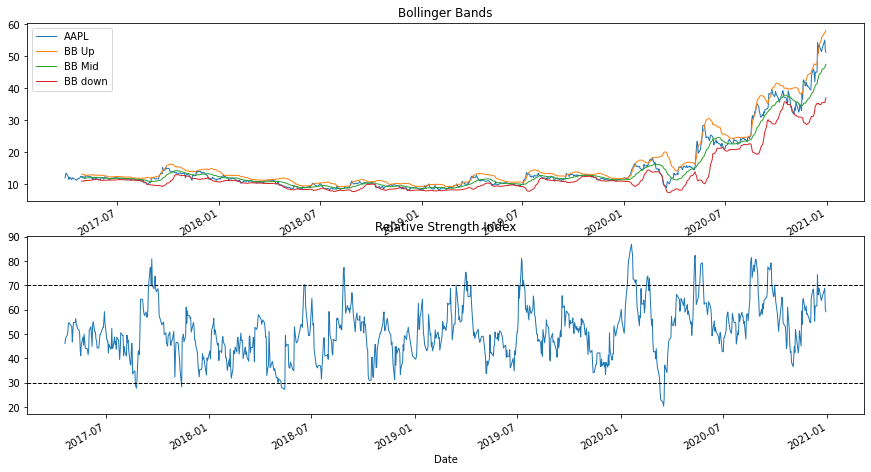

In [3]:
up, mid, low = BBANDS(df_bio["Closing price"], timeperiod=21, nbdevup=2, nbdevdn=2,
 matype=0)
rsi = RSI(df_bio["Closing price"], timeperiod=14)
data = pd.DataFrame({'AAPL': df_bio["Closing price"], 'BB Up': up, 'BB Mid': mid,
 'BB down': low, 'RSI': rsi})
fig, axes= plt.subplots(nrows=2, figsize=(15, 8))
data.drop('RSI', axis=1).plot(ax=axes[0], lw=1, title='Bollinger Bands')
data['RSI'].plot(ax=axes[1], lw=1, title='Relative Strength Index')
axes[1].axhline(70, lw=1, ls='--', c='k')
axes[1].axhline(30, lw=1, ls='--', c='k')

In [4]:
df_bio["moving_average_p_pct_mean"] = df_bio["Closing price pct"].rolling(20).mean()
df_bio["moving_average_p_pct_std"] = df_bio["Closing price pct"].rolling(20).std()
df_bio["moving_average_p_pct_upper"] = df_bio["moving_average_p_pct_mean"] + 2*df_bio["moving_average_p_pct_std"]
df_bio["moving_average_p_pct_lower"] = df_bio["moving_average_p_pct_mean"] - 2*df_bio["moving_average_p_pct_std"]

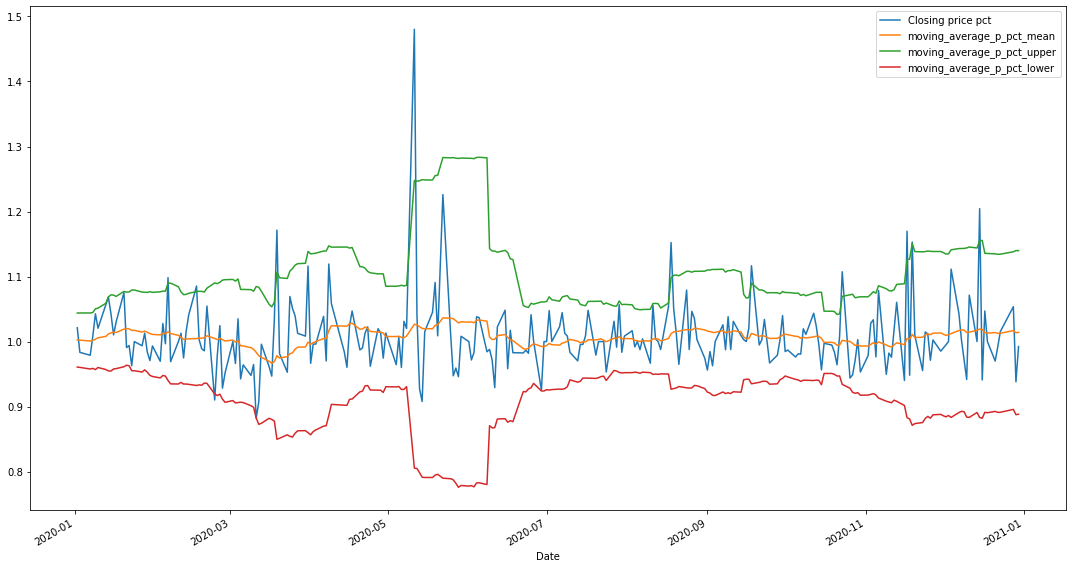

In [5]:
crit = df_bio.index > "2020-01-01"
fig, axes= plt.subplots(nrows=1, figsize=(15, 8))
df_bio[crit][["Closing price pct", "moving_average_p_pct_mean", "moving_average_p_pct_upper", "moving_average_p_pct_lower"]].plot(ax=axes)
plt.tight_layout()

In [6]:
df_bio["moving_average_p_mean"] = df_bio["Closing price"].rolling(20).mean()
df_bio["moving_average_p_std"] = df_bio["Closing price"].rolling(20).std()
df_bio["moving_average_p_upper"] = df_bio["moving_average_p_mean"] + 2*df_bio["moving_average_p_std"]
df_bio["moving_average_p_lower"] = df_bio["moving_average_p_mean"] - 2*df_bio["moving_average_p_std"]

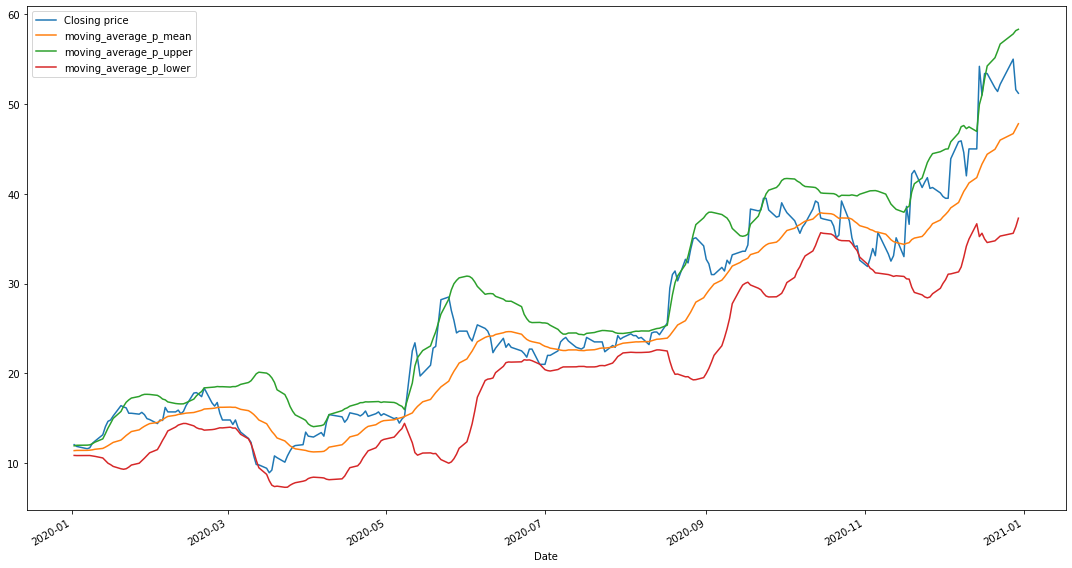

In [7]:
crit = df_bio.index > "2020-01-01"
fig, axes= plt.subplots(nrows=1, figsize=(15, 8))
df_bio[crit][["Closing price", "moving_average_p_mean", "moving_average_p_upper", "moving_average_p_lower"]].plot(ax=axes)
plt.tight_layout()

In [8]:
pd.Series([1,2,3,4,5,6,7,8,9]).quantile(0.01)
pd.Series([1,2,3,4,5,6,7,8,9]).quantile(1-0.01)

8.92

In [9]:
outlier_cutoff = 0.3
lag = 2
(df_bio[["Closing price", "Turnover"]]
    .pct_change(lag).stack().pipe(lambda x:
 x.clip(lower=x.quantile(outlier_cutoff),
 upper=x.quantile(1-outlier_cutoff)))
.add(1)
.pow(1/lag)
 .sub(1)
)

Date                     
2017-03-31  Closing price    0.027896
            Turnover        -0.024718
2017-04-03  Closing price   -0.005877
            Turnover        -0.024718
2017-04-04  Closing price   -0.024718
                               ...   
2020-12-28  Turnover         0.027896
2020-12-29  Closing price   -0.005764
            Turnover         0.027896
2020-12-30  Closing price   -0.024718
            Turnover         0.023876
Length: 1880, dtype: float64

In [10]:
outlier_cutoff = 0.3
lag = 2
(df_bio[["Closing price", "Turnover"]]
    .pct_change(lag).stack().pipe(lambda x:
 x.clip(lower=x.quantile(outlier_cutoff),
 upper=x.quantile(1-outlier_cutoff)))
.add(1)
.pow(1/lag)
 .sub(1)
).swaplevel()

               Date      
Closing price  2017-03-31    0.027896
Turnover       2017-03-31   -0.024718
Closing price  2017-04-03   -0.005877
Turnover       2017-04-03   -0.024718
Closing price  2017-04-04   -0.024718
                               ...   
Turnover       2020-12-28    0.027896
Closing price  2020-12-29   -0.005764
Turnover       2020-12-29    0.027896
Closing price  2020-12-30   -0.024718
Turnover       2020-12-30    0.023876
Length: 1880, dtype: float64

In [11]:
outlier_cutoff = 0.01
data = pd.DataFrame()
lags = [1, 2, 3, 6, 9, 12]
for lag in lags:
    data[f'return_{lag}m'] = (df_bio
    .pct_change(lag)
    .stack()
    .pipe(lambda x:
    x.clip(lower=x.quantile(outlier_cutoff),
    upper=x.quantile(1-outlier_cutoff)))
    .add(1)
    .pow(1/lag)
    .sub(1)
    )
data = data.swaplevel().dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17568 entries, ('Bid', Timestamp('2017-04-18 00:00:00')) to ('moving_average_p_lower', Timestamp('2020-12-30 00:00:00'))
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   return_1m   17568 non-null  float64
 1   return_2m   17568 non-null  float64
 2   return_3m   17568 non-null  float64
 3   return_6m   17568 non-null  float64
 4   return_9m   17568 non-null  float64
 5   return_12m  17568 non-null  float64
dtypes: float64(6)
memory usage: 923.2+ KB


In [12]:
data.head(20)

,,return_1m,return_2m,return_3m,return_6m,return_9m,return_12m
,Date,,,,,,
Bid,2017-04-18,-0.050633,-0.025645,-0.017171,-0.010699,-0.011638,-0.004670
Ask,2017-04-18,-0.037500,-0.018929,-0.011284,-0.008405,-0.010057,-0.002833
Opening price,2017-04-18,0.008439,-0.002086,0.009958,0.006418,-0.013460,-0.006354
High price,2017-04-18,0.012605,0.000000,0.001387,-0.001376,-0.016528,-0.008501
Low price,2017-04-18,-0.021645,-0.021416,-0.005831,-0.002920,-0.011151,-0.004302
Closing price,2017-04-18,-0.037975,-0.019171,-0.016952,-0.008512,-0.011494,-0.003919
Average price,2017-04-18,-0.008942,-0.011818,-0.004260,-0.003676,-0.014080,-0.005884
Total volume,2017-04-18,1.499485,0.846772,-0.115486,-0.055794,-0.074494,-0.188023
Turnover,2017-04-18,1.477065,0.824937,-0.119260,-0.059263,-0.087527,-0.192802


In [526]:
df_bio.corr()

,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Closing price pct,cumprod,Closing price pct shift1,Turnover shift1,High price shift1,Low price shift1
Bid,1.000000,0.999811,0.996807,0.998637,0.998276,0.999705,0.999218,0.333518,0.599816,0.597011,0.080457,0.999705,0.098627,0.593327,0.995267,0.994836
Ask,0.999811,1.000000,0.996698,0.998652,0.998132,0.999761,0.999158,0.331759,0.598915,0.595612,0.083237,0.999761,0.100612,0.592794,0.995063,0.994645
Opening price,0.996807,0.996698,1.000000,0.997652,0.998517,0.996555,0.998250,0.328275,0.593316,0.590275,0.036285,0.996561,0.099290,0.602476,0.997892,0.997309
High price,0.998637,0.998652,0.997652,1.000000,0.997736,0.998660,0.999236,0.345979,0.608814,0.607381,0.080071,0.998668,0.101150,0.600166,0.995946,0.994866
Low price,0.998276,0.998132,0.998517,0.997736,1.000000,0.998014,0.999237,0.323092,0.589516,0.583539,0.059785,0.998014,0.094607,0.593657,0.996691,0.996969
Closing price,0.999705,0.999761,0.996555,0.998660,0.998014,1.000000,0.999059,0.339601,0.604484,0.601656,0.097780,1.000000,0.095441,0.592448,0.994940,0.994585
Average price,0.999218,0.999158,0.998250,0.999236,0.999237,0.999059,1.000000,0.334887,0.600479,0.596459,0.073931,0.999061,0.098896,0.597141,0.996495,0.996066
Total volume,0.333518,0.331759,0.328275,0.345979,0.323092,0.339601,0.334887,1.000000,0.818348,0.801971,0.270093,0.384941,0.144957,0.429053,0.362317,0.350940
Turnover,0.599816,0.598915,0.593316,0.608814,0.589516,0.604484,0.600479,0.818348,1.000000,0.952975,0.243267,0.619433,0.140641,0.555926,0.590897,0.584486
Trades,0.597011,0.595612,0.590275,0.607381,0.583539,0.601656,0.596459,0.801971,0.952975,1.000000,0.258902,0.620886,0.157546,0.556019,0.593885,0.584555


In [515]:
df_bio[df_bio.isna().any(axis=1)]

,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Closing price pct,cumprod
Date,,,,,,,,,,,,
2017-03-29,11.90,11.95,12.9,13.35,11.9,11.95,12.491,1181897.0,14763247.75,1027,NaN,NaN
2017-06-27,12.00,12.10,NaN,NaN,NaN,12.00,NaN,NaN,NaN,0,1.000000,1.004184
2018-02-21,10.70,11.05,NaN,NaN,NaN,11.20,NaN,NaN,NaN,0,1.000000,0.937238
2018-03-01,10.80,11.00,NaN,NaN,NaN,11.05,NaN,NaN,NaN,0,1.000000,0.924686
2018-03-19,10.15,10.60,NaN,NaN,NaN,10.60,NaN,NaN,NaN,0,1.000000,0.887029
2018-08-02,8.52,9.30,NaN,NaN,NaN,9.38,NaN,NaN,NaN,0,1.000000,0.784937
2019-11-01,NaN,NaN,NaN,NaN,NaN,12.80,NaN,NaN,NaN,0,1.011858,1.071130
2020-11-19,NaN,NaN,37.3,42.20,37.3,42.20,40.002,300821.0,12033364.10,594,1.153005,3.531381


Montly prices

In [730]:
monthly_prices = df_bio["Closing price"].resample('M').last().to_frame()

In [757]:
monthly_prices["moving_average_p_mean"] = monthly_prices["Closing price"].rolling(20).mean()
monthly_prices["moving_average_p_std"] = monthly_prices["Closing price"].rolling(20).std()
monthly_prices["moving_average_p_upper"] = monthly_prices["moving_average_p_mean"] + 2*monthly_prices["moving_average_p_std"]
monthly_prices["moving_average_p_lower"] = monthly_prices["moving_average_p_mean"] - 2*monthly_prices["moving_average_p_std"]

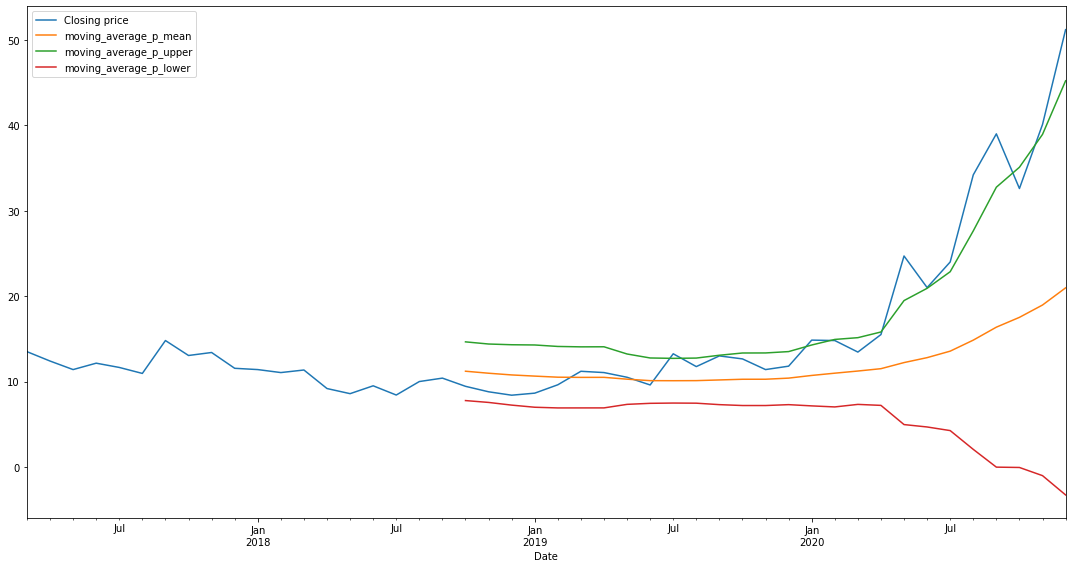

In [759]:
#crit = df_bio.index > "2020-01-01"
fig, axes= plt.subplots(nrows=1, figsize=(15, 8))
monthly_prices[["Closing price", "moving_average_p_mean", "moving_average_p_upper", "moving_average_p_lower"]].plot(ax=axes)
plt.tight_layout()

In [731]:
monthly_prices.head()

,Closing price
Date,
2017-03-31,13.50
2017-04-30,12.40
2017-05-31,11.40
2017-06-30,12.15
2017-07-31,11.65


In [734]:
lags = [1, 2, 3, 6, 9, 12]
#data[f'return_{lag}m'] = (monthly_prices.pct_change(lag)
for lag in lags:
    monthly_prices[f"lag_{lag}m"] = monthly_prices["Closing price"].pct_change(lag)
monthly_prices.head()

,Closing price,lag_1m,lag_2m,lag_3m,lag_6m,lag_9m,lag_12m
Date,,,,,,,
2017-03-31,13.50,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-30,12.40,-0.081481,NaN,NaN,NaN,NaN,NaN
2017-05-31,11.40,-0.080645,-0.155556,NaN,NaN,NaN,NaN
2017-06-30,12.15,0.065789,-0.020161,-0.100000,NaN,NaN,NaN
2017-07-31,11.65,-0.041152,0.021930,-0.060484,NaN,NaN,NaN


In [737]:
data = monthly_prices[monthly_prices.columns[1:]]
data.describe()

,lag_1m,lag_2m,lag_3m,lag_6m,lag_9m,lag_12m
count,45.000000,44.000000,43.000000,40.000000,37.000000,34.000000
mean,0.042627,0.081450,0.112150,0.255466,0.378911,0.476767
std,0.171814,0.240683,0.252242,0.502717,0.757902,0.894457
min,-0.191189,-0.244053,-0.223529,-0.359701,-0.358108,-0.343284
25%,-0.081481,-0.094356,-0.088527,-0.025594,-0.099567,-0.203395
50%,-0.012987,-0.011284,0.094737,0.108526,0.169811,0.213740
75%,0.140351,0.226757,0.251340,0.236769,0.464120,0.682471
max,0.593548,0.836431,0.857143,1.899628,2.806691,3.338983


In [739]:
import seaborn as sns

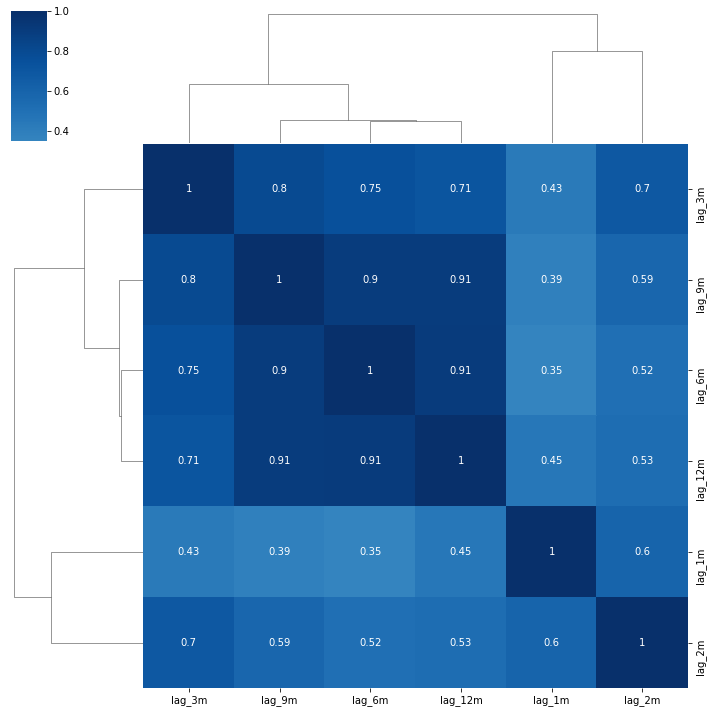

In [740]:
sns.clustermap(data.corr('spearman'), annot=True, center=0, cmap='Blues');

<AxesSubplot:xlabel='Date'>

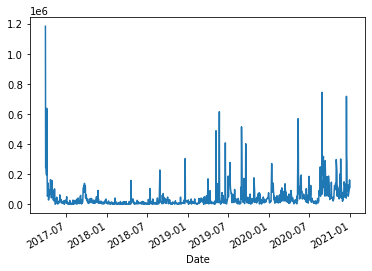

In [516]:
df_bio["Total volume"].plot()

<AxesSubplot:xlabel='Date'>

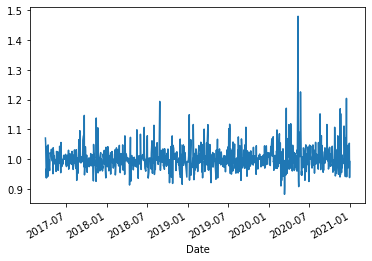

In [519]:
df_bio["Closing price pct"].plot()

<AxesSubplot:>

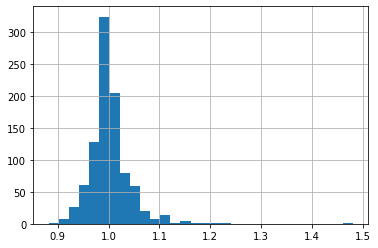

In [521]:
df_bio["Closing price pct"].hist(bins=30)

<AxesSubplot:xlabel='Date'>

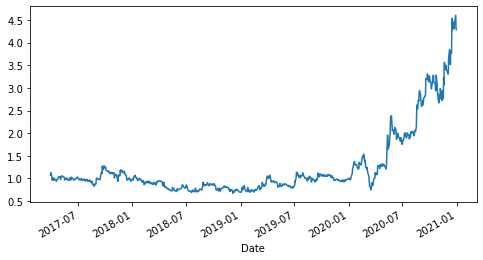

In [527]:
df_bio["cumprod"].plot(figsize=(8,4))

In [2]:
from pykalman import KalmanFilter

In [4]:
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)

In [11]:
state_means, _ = kf.filter(df_bio["Closing price"])

In [ ]:
sp500_smoothed = sp500.to_frame('close')
sp500_smoothed['Kalman Filter'] = state_means
for months in [1,2,3]:
    sp500_smoothed[f'MA ({months}m)'] = sp500.rolling(window=months*21).mean()

ax = sp500_smoothed.plot(title='Kalman Filter vs Moving Average', figsize=(14,6), lw=1, rot=0)
ax.set_xlabel('')
ax.set_ylabel('S&P 500')
plt.tight_layout()
sns.despine();

In [20]:
import seaborn as sns

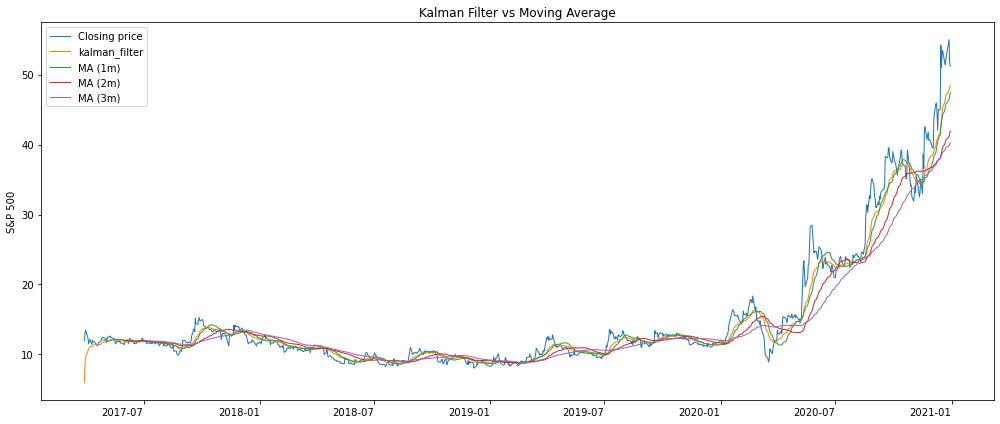

In [24]:
df_bio_smoothed = df_bio["Closing price"].to_frame()
df_bio_smoothed["kalman_filter"] = state_means
for months in [1,2,3]:
    df_bio_smoothed[f'MA ({months}m)'] = df_bio_smoothed["Closing price"].rolling(window=months*21).mean()

ax = df_bio_smoothed.plot(title='Kalman Filter vs Moving Average', figsize=(14,6), lw=1, rot=0)
ax.set_xlabel('')
ax.set_ylabel('S&P 500')
plt.tight_layout()
#sns.despine();

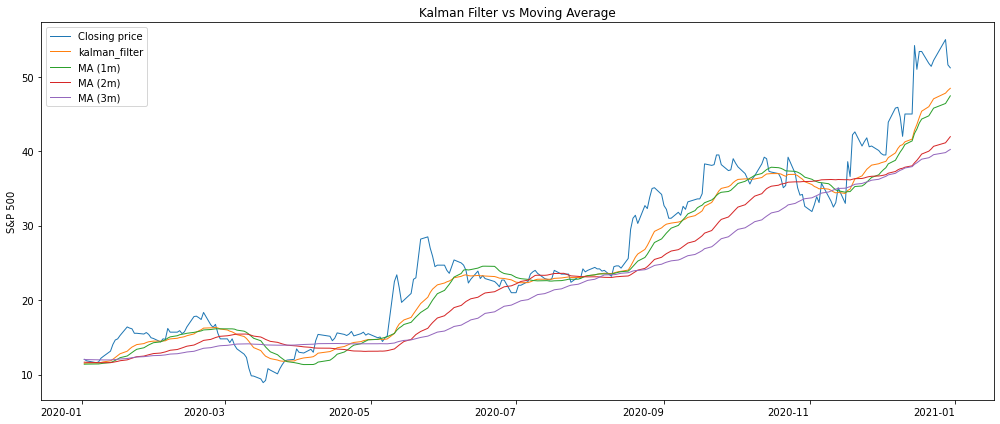

In [27]:
ax = df_bio_smoothed[df_bio_smoothed.index > "2020-01-01"].plot(title='Kalman Filter vs Moving Average', figsize=(14,6), lw=1, rot=0)
ax.set_xlabel('')
ax.set_ylabel('S&P 500')
plt.tight_layout()
#sns.despine();

In [28]:
import pywt